<center><img src="https://i.imgur.com/YNtjmbq.png" width="800"></center> 

# Práctica 3 – Exploración de Redes Gephi


<div class="alert alert-info" role="alert">
    
## Data para la sesión

Para esta sesión, los datos del archivo **SeattleTop** puedes descargarlos en _tu_ carpeta **data** desde este [enlace](https://drive.google.com/drive/folders/1QXy0RwgNUBryirnVx0-_-rfr3WZxSld5?usp=sharing).
</div>



### Pasos previos

Carguemos la data que vimos la sesión 1, sobre la relación entre las elites del Perú:

In [1]:
import pandas as pd
import networkx as nx

LinkPeruElite="https://docs.google.com/spreadsheets/d/e/2PACX-1vReqFHgPvGpZiSozcooJkZOH7kOCvtpgtq0fvuIehQ6MfqM-To93umwRY0pJBZzoCetj_ptmLCpNnGv/pub?output=xlsx"

# leer tabla (matriz)
Peru_adjMx=pd.read_excel(LinkPeruElite,index_col=0,sheet_name='adjacency')

# crear red desde la tabla (matriz)
PeruNet_AdjMx=nx.from_pandas_adjacency(Peru_adjMx) # no dirigida

La data se cargó de una matriz de adyacencia. Como se recuerda esta red tiene **isolates**.

##### list(nx.isolates(PeruNet_AdjMx))

In [44]:
len(PeruNet_AdjMx.nodes()),len(PeruNet_AdjMx.edges())

(37, 135)

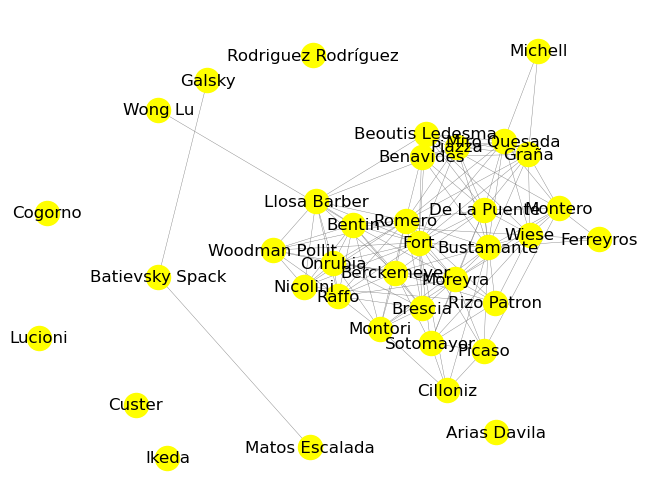

In [51]:
nodesPositions=nx.spring_layout(PeruNet_AdjMx,k=0.8)
nx.draw(PeruNet_AdjMx,nodesPositions, with_labels=True,edge_color='grey',width=0.3,node_color='yellow')

Las redes con _aislados_ pueden significar problemas en cálculos posteriores. En alguno casos se omiten, en algunos se contabilizan, y en otros generan errores. Si la data está en una matriz, puede ser leido bien, pero si está en una edgelist u otro formato no matricial pueden suceder diversos escenarios con resultados no confiables, por lo que hay que estar atento.

Exportaré esta red en tres formatos diferentes, para verlos luego en Gephi.


In [52]:
import os

filename1=os.path.join('data','PeruNet_AdjMx.gml') 
filename2=os.path.join('data','PeruNet_AdjMx.graphml') 
filename3=os.path.join('data','PeruNet_AdjMx.net') # formato para pajek

# guardando:
nx.write_gml(PeruNet_AdjMx,filename1)
nx.write_graphml(PeruNet_AdjMx,filename2)
nx.write_pajek(PeruNet_AdjMx,filename3)

## De UCINET a Gephi

Como se recuerda, UCINET abre sin problemas una matriz de adyacencia. En este ocasión convertiremos el archivo **PeruNet_AdjMx_ucinet** a un formato confiable para Gephi, el formato Pajek.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/pajekFromUcinet1.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 1. Ruta para convertir a Pajek. 
 </figcaption>
 Fuente: Autor.
</figure>


<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/pajekFromUcinet2.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 2. Menu de exportación a Pajek. 
 </figcaption>
 Fuente: Autor.
</figure>


<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/openGephi1.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 3. Opción para abrir archivo de red en Gephi. 
 </figcaption>
 Fuente: Autor.
</figure>

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/openGephi2.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 4. Seleción de archivo creado por UCINET. 
 </figcaption>
 Fuente: Autor.
</figure>


<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/openGephi3.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 5. Configuración del archivo Pajek  creado por UCINET. 
 </figcaption>
 Fuente: Autor.
</figure>


<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/layoutGephi1.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 6. Vista inicial de la red. Elegir Layout para dispersar nodos. 
 </figcaption>
 Fuente: Autor.
</figure>


<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/layoutGephi1.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 6. Vista inicial de la red. Elegir Layout para dispersar nodos. 
 </figcaption>
 Fuente: Autor.
</figure>



<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/layoutGephi1.png?raw=true" width="700"/>


<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/layoutGephi2.png?raw=true" width="700"/>


<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/layoutGephi3.png?raw=true" width="700"/>

<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/statsGephi.png?raw=true" width="400"/>






## Average Degree

In [120]:
pd.Series([x[1] for x in PeruNet_AdjMx.degree()]).mean()

7.297297297297297

<Axes: ylabel='count'>

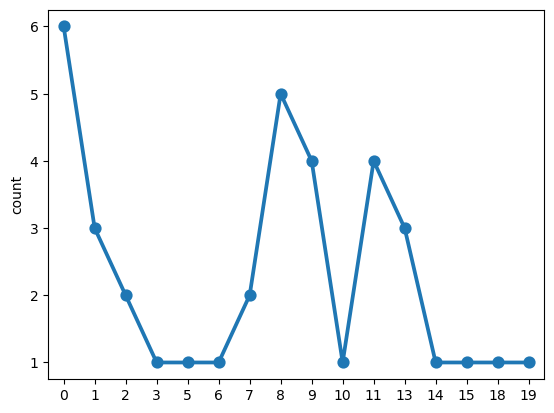

In [118]:
import seaborn as sns

sns.pointplot(pd.Series([x[1] for x in PeruNet_AdjMx.degree()]).value_counts().sort_index())

<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/AverageDegree_gephi.png?raw=true" width="600"/>

## Diameter

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/diameter.png" style="width:70%">
<figcaption align = "center"> Figura 3. Diámetro. 
 </figcaption>
 Fuente: Autor.
</figure>

In [122]:
# nx.diameter(PeruNet_AdjMx)

In [128]:
PeruNet_AdjMx_nodesInBig = sorted(nx.connected_components(PeruNet_AdjMx), key=len, reverse=True)
PeruNet_AdjMx_bigger=PeruNet_AdjMx.subgraph(PeruNet_AdjMx_nodesInBig[0])
nx.diameter(PeruNet_AdjMx_bigger)

4

In [133]:
nx.average_shortest_path_length(PeruNet_AdjMx_bigger)

1.7407407407407407

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/Diameter_gephi1.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 3. Diámetro. 
 </figcaption>
 Fuente: Autor.
</figure>


<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/Diameter_gephi2.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 3. Diámetro. 
 </figcaption>
 Fuente: Autor.
</figure>

## Density

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/density.png" style="width:70%">
<figcaption align = "center"> Figura 4. Densidades en las redes. 
 </figcaption>
 <a href="https://medium.com/@jane.vdplas/https-medium-com-protium-digital-what-are-network-effects-4f1ec159b6">Fuente: Medium</a>
</figure>


In [136]:
nx.density(PeruNet_AdjMx)

0.20270270270270271


<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/Density_gephi.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 3. Diámetro. 
 </figcaption>
 Fuente: Autor.
</figure>

## Link analysis

### HITS

In [153]:
h,a=nx.hits(PeruNet_AdjMx)

In [163]:
pd.DataFrame({'hubs':h,'authorities':a}).round(4)/2

,hubs,authorities
Romero,0.03365,0.03365
Graña,0.01905,0.01905
Miro Quesada,0.01905,0.01905
Moreyra,0.02780,0.02780
Fort,0.03295,0.03295
De La Puente,0.02535,0.02535
Wiese,0.01540,0.01540
Onrubia,0.02280,0.02280
Brescia,0.01835,0.01835
Nicolini,0.01670,0.01670


<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/hits_gephi.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 3. Diámetro. 
 </figcaption>
 Fuente: Autor.
</figure>

In [164]:
nx.pagerank(PeruNet_AdjMx)

{'Romero': 0.05445033894712766,
 'Graña': 0.03682084488615779,
 'Miro Quesada': 0.03682084488615779,
 'Moreyra': 0.046400502494686295,
 'Fort': 0.05811967294357802,
 'De La Puente': 0.043653150178090426,
 'Wiese': 0.029879580349281436,
 'Onrubia': 0.034687040416754626,
 'Brescia': 0.026231458469575548,
 'Nicolini': 0.02656579213551228,
 'Montero': 0.03096462624433427,
 'Picaso': 0.02171280349855295,
 'Bentin': 0.04469804996050442,
 'Benavides': 0.02375990622396452,
 'Bustamante': 0.04227804882665736,
 'Woodman Pollit': 0.02635608496037021,
 'Raffo': 0.034687040416754626,
 'Piazza': 0.0294475470925665,
 'Berckemeyer': 0.04054053151443548,
 'Llosa Barber': 0.03206943832203193,
 'Beoutis Ledesma': 0.02689660580315513,
 'Rizo Patron': 0.023740011013434273,
 'Montori': 0.029589134537049495,
 'Sotomayor': 0.027214269822863915,
 'Cilloniz': 0.018828644988047726,
 'Ferreyros': 0.013313530047296067,
 'Michell': 0.010392688567047146,
 'Wong Lu': 0.007624759162476045,
 'Batievsky Spack': 0.045742

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/page_gephi.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 3. Diámetro. 
 </figcaption>
 Fuente: Autor.
</figure>

## CC

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/strongly_connected.png" style="width:70%">
<figcaption align = "center"> Figura 1. Red y componentes fuertemente conectados </figcaption>
    <a href="https://en.wikipedia.org/wiki/Strongly_connected_component" class="alert-link">Fuente:Wikipedia</a>
</figure>

In [167]:
nx.number_connected_components(PeruNet_AdjMx)

8


<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/connected_gephi.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 1. Red y componentes fuertemente conectados </figcaption>
    <a href="https://en.wikipedia.org/wiki/Strongly_connected_component" class="alert-link">Fuente:Wikipedia</a>
</figure>



<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/connected_gephi2.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 1. Red y componentes fuertemente conectados </figcaption>
    <a href="https://en.wikipedia.org/wiki/Strongly_connected_component" class="alert-link">Fuente:Wikipedia</a>
</figure>

## Explorando a nivel de actor - CENTRALIDAD

Luego de caracterizar a la red, podemos enfocarnos en la relevancia del actor en la red. La relevancia puede entenderse de diferentes maneras, y aqui las más utilizadas:

* Grado o **DEGREE**: Indica la cantidad de conexiones de un nodo, representada en general como un coeficiente, donde 100% (1) indicaría que el nodo se conecta con todos los nodos. Cuando tenemos una red dirigida, se calcula por separado el **IN**DEGREE y el **OUT**DEGREE.
* Cercanía o **CLOSENESS**: Indica que tan cerca está un nodo a todos los demás. Las conexiones de algun nodo le permiten 'llegar' más rápido a los demás que a otros. Es decir, el promedio de sus geodésicos es el menor de todos. Cuando tenemos una red dirigida, se calcula por separado el **IN**CLOSENESS y el **OUT**CLOSENESS.
* Intermediación o **BETWEENNESS**: Indica que tanto es necesario un nodo para que algun nodo llegue a otro nodo. Esta importancia nace también del concepto del geodésico, pues un actor con alto betweenness aparece mucho en los geodésicos de la red,  y en el caso extremo, tiene la capacidad de desconectar a la red.

La Figura 6 ejemplifica estos conceptos.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/centrality.png" style="width:70%">
<figcaption align = "center"> Figura 6. Degree, Closeness y Betweenness. 
 </figcaption>
 <a href="https://www.mdpi.com/2071-1050/14/7/3897">Fuente: Sustainability</a>
</figure>

Aquí podemos ver estas medidas para todos los actores:

In [21]:
actorMeasures=pd.concat([pd.DataFrame.from_dict(nx.out_degree_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['OutDegree']),
           pd.DataFrame.from_dict(nx.in_degree_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['InDegree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(TopFromAdjacency.reverse()),
                                  orient='index',
                                  columns=['OutCloseness']),
           pd.DataFrame.from_dict(nx.closeness_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['InCloseness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)
## data
actorMeasures

,OutDegree,InDegree,OutCloseness,InCloseness,Betweenness
rachelerman,0.577778,0.533333,0.703125,0.653333,0.049295
mattmcilwain,0.200000,0.288889,0.529412,0.529730,0.006917
DaveParkerSEA,0.800000,0.333333,0.833333,0.544444,0.055038
toddbishop,0.866667,0.688889,0.882353,0.739623,0.155510
ashannstew,0.333333,0.266667,0.584416,0.522667,0.003663
LeslieFeinzaig,0.355556,0.400000,0.608108,0.576471,0.010229
akipman,0.022222,0.133333,0.340909,0.483951,0.000063
matt_oppy,0.577778,0.244444,0.703125,0.515789,0.017005
gilbert,0.155556,0.355556,0.473684,0.560000,0.003672
juliesandler,0.577778,0.577778,0.703125,0.664407,0.043588


Las Figuras 7 y 8 revelan los actores más relevantes.

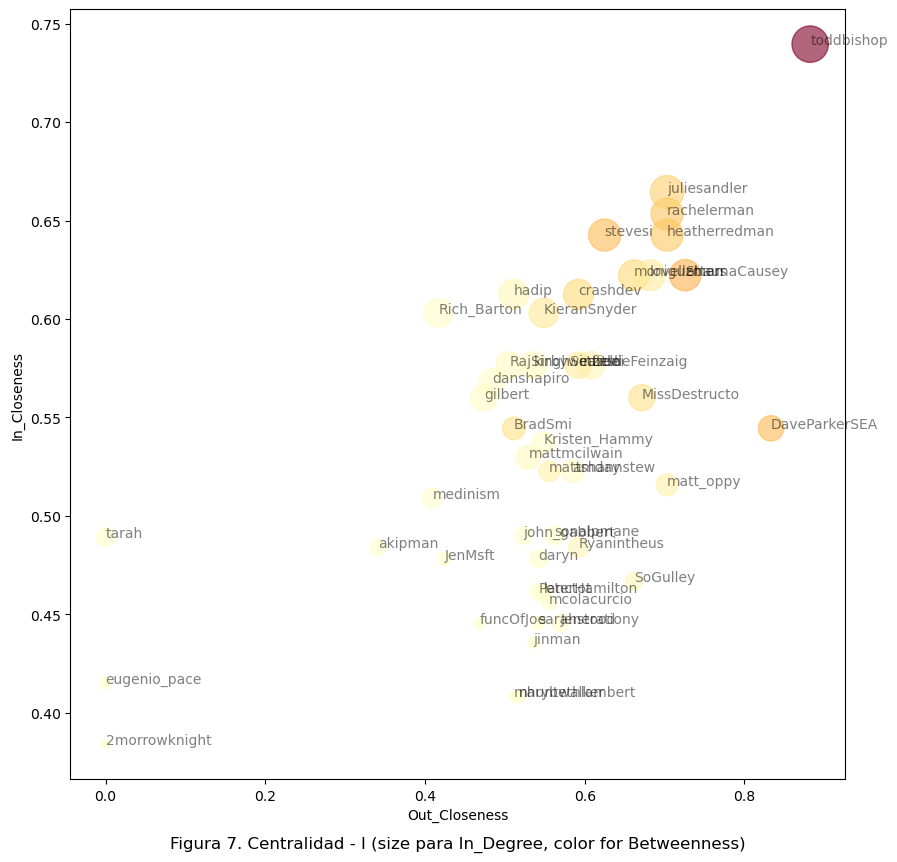

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(actorMeasures.OutCloseness, actorMeasures.InCloseness,s=1000*actorMeasures.InDegree,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.OutCloseness,actorMeasures.InCloseness)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("Figura 7. Centralidad - I (size para In_Degree, color for Betweenness)", y=-0.1)
plt.xlabel("Out_Closeness")
plt.ylabel("In_Closeness")
plt.show()

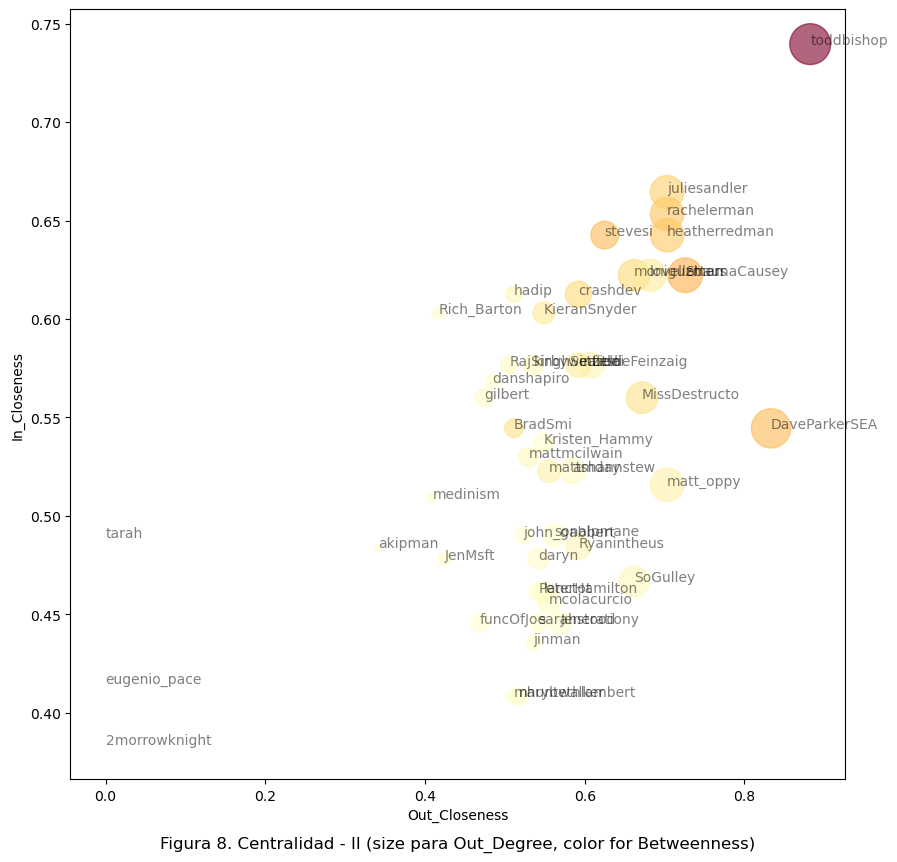

In [23]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(actorMeasures.OutCloseness, actorMeasures.InCloseness,s=1000*actorMeasures.OutDegree,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.OutCloseness,actorMeasures.InCloseness)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("Figura 8. Centralidad - II (size para Out_Degree, color for Betweenness)", y=-0.1)
plt.xlabel("Out_Closeness")
plt.ylabel("In_Closeness")
plt.show()

# Practicando con UCINET